## Importing Libraries

In [86]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  
from scipy.stats import f
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


## Importing Datasets

In [32]:
fault_free_training_db = pd.read_csv(r"E:\TY_SEM6\EDAI\Database\fault_free_training.csv")
fault_free_training_db.head()


faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
0            0              1       1  0.25038   3674.0   4529.0   9.2320   
1            0              1       2  0.25109   3659.4   4556.6   9.4264   
2            0              1       3  0.25038   3660.3   4477.8   9.4426   
3            0              1       4  0.24977   3661.3   4512.1   9.4776   
4            0              1       5  0.29405   3679.0   4497.0   9.3381   

   xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4   xmv_5   xmv_6  \
0   26.889   42.402   2704.3  ...  53.744  24.657  62.544  22.137  39.935   
1   26.721   42.576   2705.0  ...  53.414  24.588  59.259  22.084  40.176   
2   26.875   42.070   2706.2  ...  54.357  24.666  61.275  22.380  40.244   
3   26.758   42.063   2707.2  ...  53.946  24.725  59.856  22.277  40.257   
4   26.889   42.650   2705.1  ...  53.658  28.797  60.717  21.947  39.144   

    xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0  42.323  47.757  47.510  41.258  18.447  
1  38.554  43.692  47.427  41.359  17.194  
2  38.990  46.699  47.468  41.199  20.530  
3  38.072  47.541  47.658  41.643  18.089  
4  41.955  47.645  47.346  41.507  18.461  

[5 rows x 55 columns]

In [67]:
#faulty_training_db = pd.read_csv(r"E:\TY_SEM6\EDAI\Database\faulty_training.csv")
#faulty_training_db.head()
faulty_testing_db = pd.read_csv(r"E:\TY_SEM6\EDAI\Database\faulty_testing.csv")
faulty_training_db.head()


faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
0            1              1       1  0.25038   3674.0   4529.0   9.2320   
1            1              1       2  0.25109   3659.4   4556.6   9.4264   
2            1              1       3  0.25038   3660.3   4477.8   9.4426   
3            1              1       4  0.24977   3661.3   4512.1   9.4776   
4            1              1       5  0.29405   3679.0   4497.0   9.3381   

   xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4   xmv_5   xmv_6  \
0   26.889   42.402   2704.3  ...  53.744  24.657  62.544  22.137  39.935   
1   26.721   42.576   2705.0  ...  53.414  24.588  59.259  22.084  40.176   
2   26.875   42.070   2706.2  ...  54.357  24.666  61.275  22.380  40.244   
3   26.758   42.063   2707.2  ...  53.946  24.725  59.856  22.277  40.257   
4   26.889   42.650   2705.1  ...  53.658  28.797  60.717  21.947  39.144   

    xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0  42.323  47.757   47.51  41.258  18.447  
1  38.554  43.692  47.427  41.359  17.194  
2  38.990  46.699  47.468  41.199  20.530  
3  38.072  47.541  47.658  41.643  18.089  
4  41.955  47.645  47.346  41.507  18.461  

[5 rows x 55 columns]

In [68]:
df_train = fault_free_training_db[fault_free_training_db.simulationRun==1].iloc[:,3:]

df_test = faulty_training_db[(faulty_training_db.simulationRun==1)&
                               (faulty_training_db.faultNumber==1)].iloc[:,3:]

## Visualization

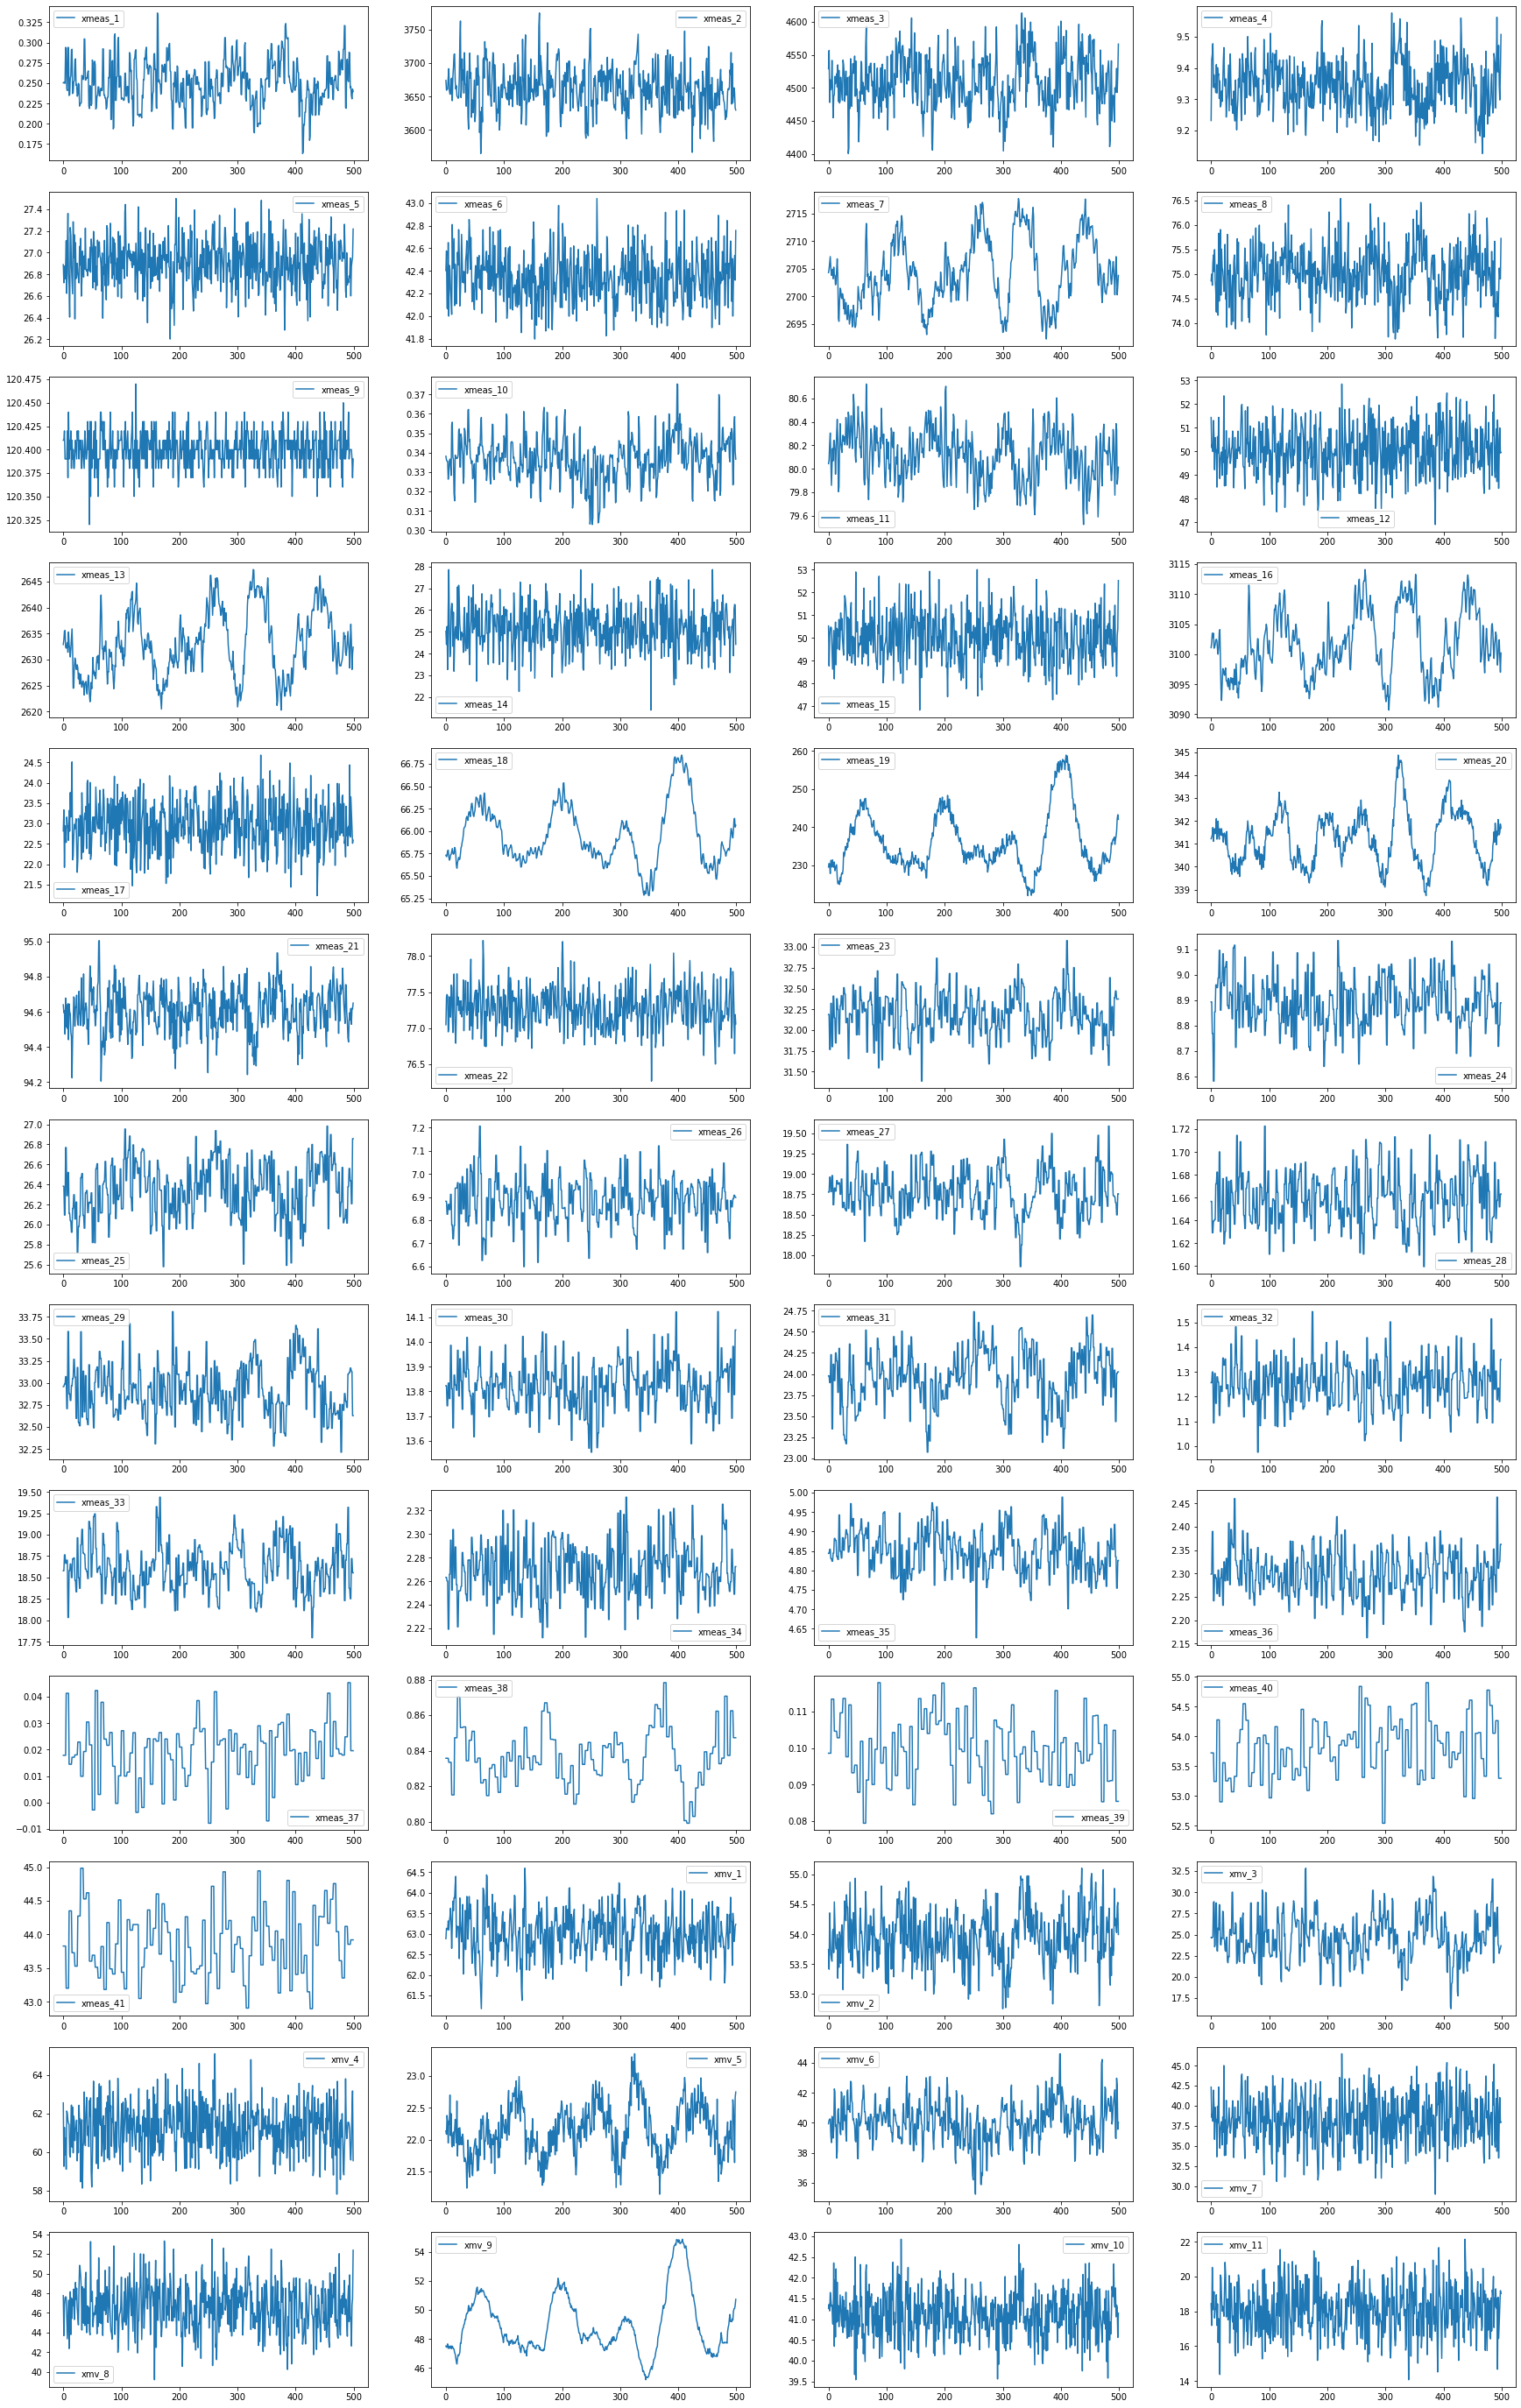

In [69]:
df_train = fault_free_training_db[fault_free_training_db.simulationRun==1].iloc[:,3:]

fig, ax = plt.subplots(13,4,figsize=(30,50))

for i in range(df_train.shape[1]):
    df_train.iloc[:,i].plot(ax=ax.ravel()[i]) 
    ax.ravel()[i].legend();

In [87]:
#test_f1_run1 = faulty_training_db[(faulty_training_db.faultNumber==7) & (faulty_training_db.simulationRun==1)].iloc[:,3:]

#fig, ax = plt.subplots(13,4,figsize=(30,50))

#for i in range(test_f1_run1.shape[1]):
# test_f1_run1.iloc[:,i].plot(ax=ax.ravel()[i]) 
# ax.ravel()[i].legend();


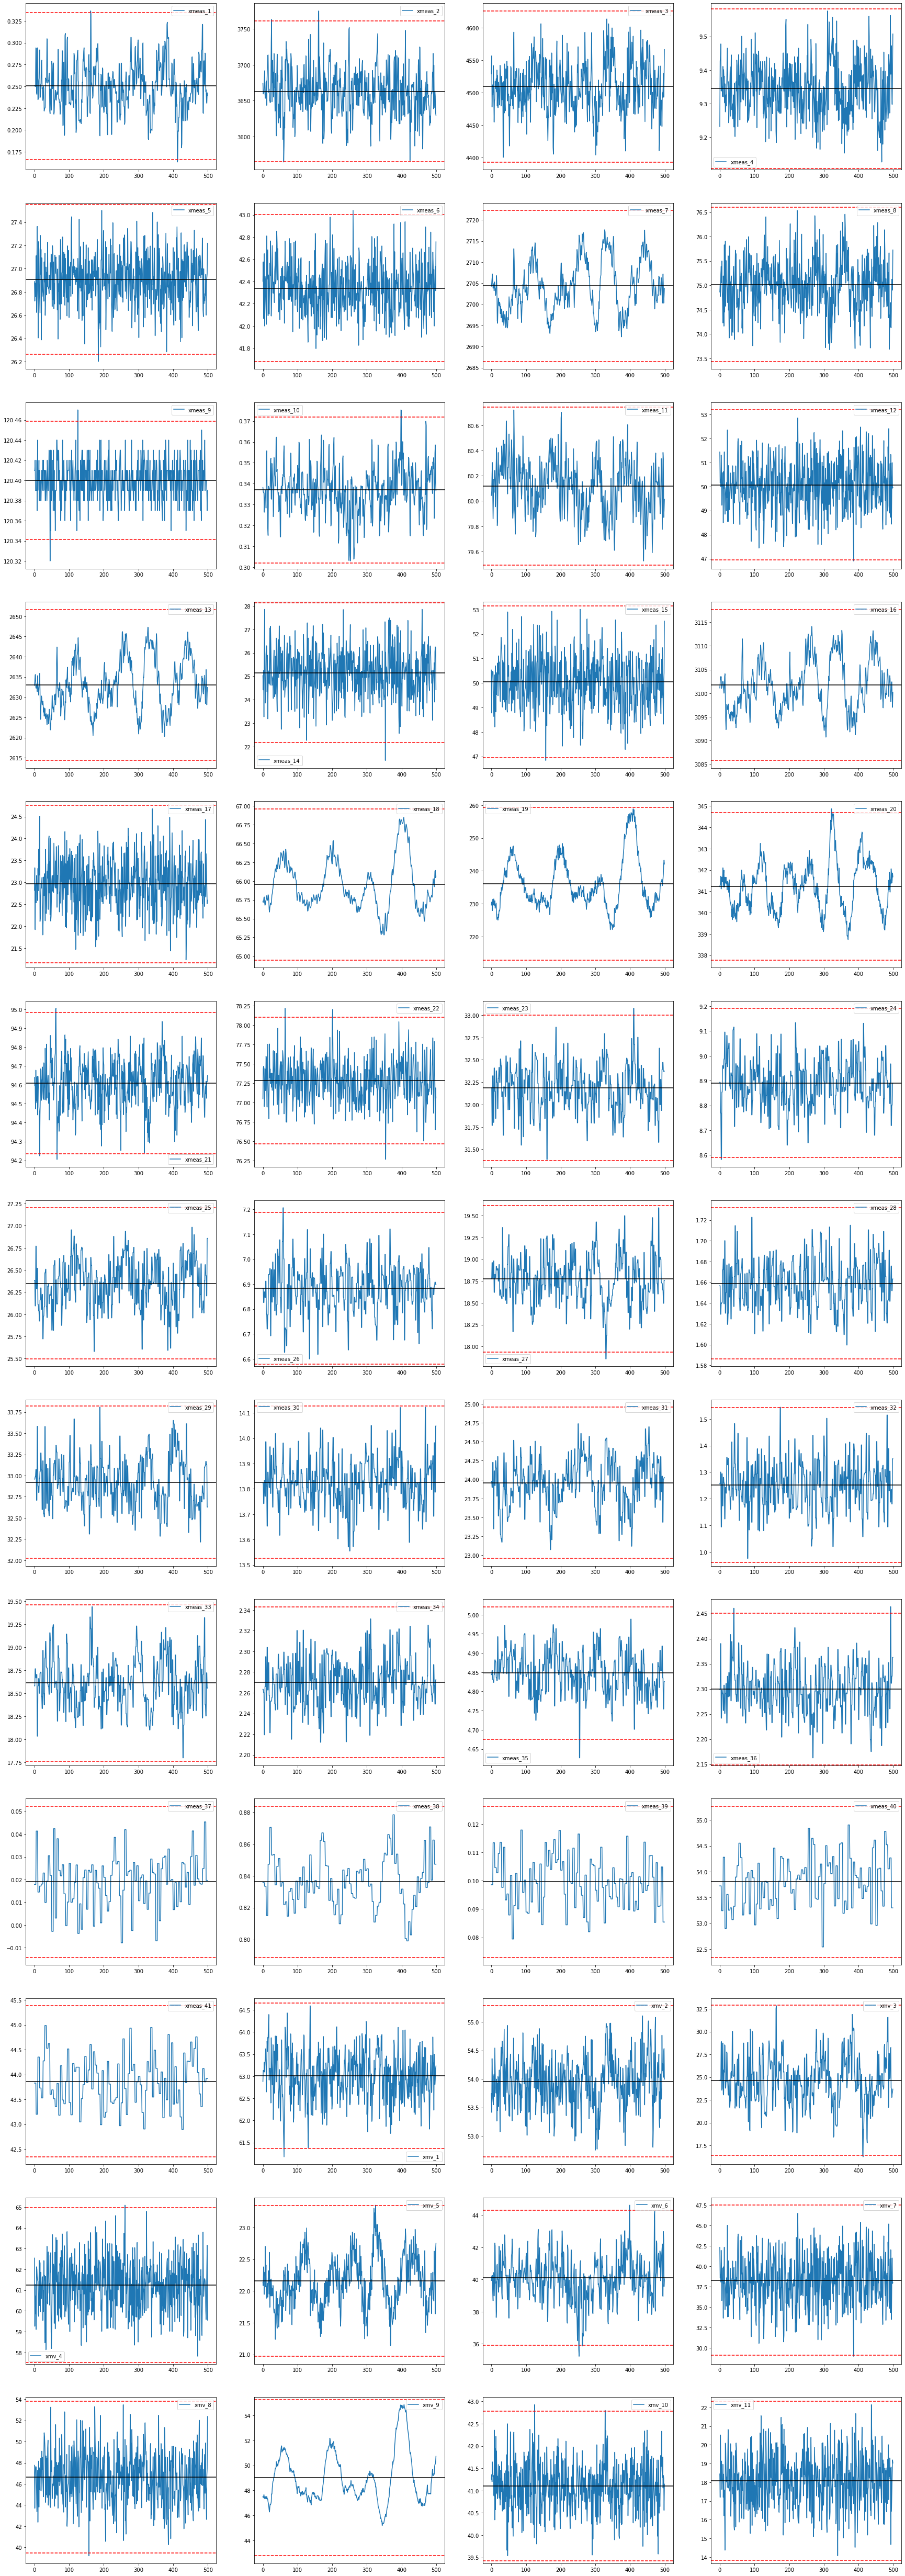

In [71]:
#Below, control charts are constructed with the training data. 
#Each card contains:variable measurements, in blue;
#The adopted reference (in this case, the average of the variable), as a black horizontal line;
#The control limits (in this case, defined as three sample standard deviations below and above the mean), as red dashed horizontal lines.

fig, ax = plt.subplots(13,4,figsize=(30,90))

for i in range(df_train.shape[1]):
    
    x = df_train.iloc[:,i]
    
    mean  = x.mean()
    std = x.std(ddof=1)
    
    LCL = mean-3*std
    UCL = mean+3*std
    
    x.plot(ax=ax.ravel()[i]) 

    ax.ravel()[i].legend();
    
    ax.ravel()[i].axhline(mean,c='k')
    ax.ravel()[i].axhline(LCL,ls='--',c='r')
    ax.ravel()[i].axhline(UCL,ls='--',c='r')

# PCA

In [95]:
class PCA():
   
   #Initializing a pca object
    def __init__ (self, a = 0.9):
       
        self.a = a
   
   
    #Model training
    def fit(self, X, conf_Q = 0.99, conf_T2 = 0.99, plot = True):
            
        # finding mean and standard deviation
        self.mu_train = X.mean(axis=0)
        self.std_train = X.std(axis=0)        
       
        # normalizing standard data
        X = np.array(((X - self.mu_train)/self.std_train))
       
        # calculating the covariance matrix 
        Cx = np.cov(X, rowvar=False)
        
        # decomposition of covariance matrix in eigen values and eigen vectors
        self.L, self.P = np.linalg.eig(Cx)
        
        # fraction of variance explained
        fv = self.L/np.sum(self.L)
        
        #  fraction of accumulated variance explained
        fva = np.cumsum(self.L)/sum(self.L)
       
        # defining the number of components
        if self.a>0 and self.a<1:
            self.a = np.where(fva>self.a)[0][0]+1 
            
        # calculating the detection limits

        # Limit of T^2
        from scipy.stats import f
        F = f.ppf(conf_T2, self.a, X.shape[0]-self.a)
        self.T2_lim = ((self.a*(X.shape[0]**2-1))/(X.shape[0]*(X.shape[0]-self.a)))*F
        
        # Limit of Q statistics
        theta = [np.sum(self.L[self.a:]**(i)) for i in (1,2,3)]
        ho = 1-((2*theta[0]*theta[2])/(3*(theta[1]**2)))
        from scipy.stats import norm
        nalpha = norm.ppf(conf_Q)
        self.Q_lim = (theta[0]*(((nalpha*np.sqrt(2*theta[1]*ho**2))/theta[0])+1+
                                ((theta[1]*ho*(ho-1))/theta[0]**2))**(1/ho))
        
        # ploting the explained variance
        if plot:
            fig, ax = plt.subplots()
            ax.bar(np.arange(len(fv)),fv)
            ax.plot(np.arange(len(fv)),fva)
            ax.set_xlabel('Number of Components')
            ax.set_ylabel('Data variance')
            ax.set_title('PCA variation explained');

            
    def predict(self, X):
        
        #Function for model testing
            
        # Normalizing test data
        X = np.array((X - self.mu_train)/self.std_train)

        # calculating T^2 statistics
        T = X@self.P[:,:self.a]
        self.T2 = np.array([T[i,:]@np.linalg.inv(np.diag(self.L[:self.a]))@T[i,:].T for i in range(X.shape[0])])

        # calculating Q statistics
        e = X - X@self.P[:,:self.a]@self.P[:,:self.a].T
        self.Q  = np.array([e[i,:]@e[i,:].T for i in range(X.shape[0])])
        
        # calculating contributions to Q
        self.c = np.absolute(X*e) 
                

    def plot_control_charts(self, fault = None):
        #Function to plot graphs     
        fig, ax = plt.subplots(1,2, figsize=(15,3))

        ax[0].semilogy(self.T2,'.')
        ax[0].axhline(self.T2_lim,ls='--',c='r');
        ax[0].set_title('Control card for $T^2$')
        
        ax[1].semilogy(self.Q,'.')
        ax[1].axhline(self.Q_lim,ls='--',c='r')
        ax[1].set_title('Control card for Q')
 
        if fault is not None:
            ax[0].axvline(fault, c='k')
            ax[1].axvline(fault, c='k')

    ###############
            
   # def plot_contributions(self, fault = None,    index = None, columns = None):
        #function to plot contribution maps
        #fig, ax = plt.subplots(figsize=(20, 6))
        
       # c = pd.DataFrame(self.c,  index = index,columns = columns)
    
        #sns.heatmap(c, ax = ax,  yticklabels=int(self.c.shape[0]/10),cmap = plt.cm.Blues);
        
        #ax.set_title('Partial Contribution of Q')
        
       # if fault is not None:
            #ax.axhline(y=c.index[fault],
                       #ls='--', c='k')

In [96]:
df_train = fault_free_training_db[(fault_free_training_db.simulationRun>=1)&
                                 (fault_free_training_db.simulationRun<5)].iloc[:,3:]

df_test = fault_free_training_db[(fault_free_training_db.simulationRun>5)&
                                (fault_free_training_db.simulationRun<10)].iloc[:,3:]

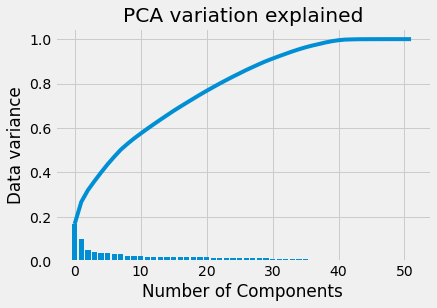

In [97]:
pca = PCA(a = 0.9)
pca.fit(df_train)

In [98]:
pca.a

30

In [99]:
pca.predict(df_test)

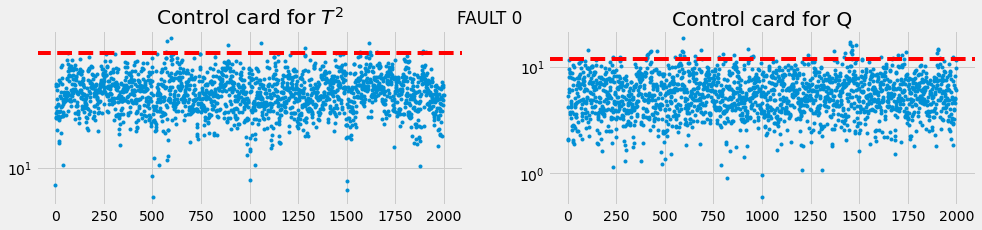

In [100]:
pca.plot_control_charts()
plt.suptitle('FAULT 0');

In [101]:
#Analyzing the [false alarm rate]
print('false alarm rate\n--------------')

print(f'T2: {(pca.T2>pca.T2_lim).sum()/pca.T2.shape[0]}')
print(f'Q: {(pca.Q>pca.Q_lim).sum()/pca.Q.shape[0]}')

false alarm rate
--------------
T2: 0.0085
Q: 0.027


## Fault 1

<ipython-input-102-2f7849e931cd>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test = faulty_testing_db[(faulty_training_db.faultNumber==Fault) &


Faultion detection rate - Fault(1)
--------------
T2: 0.9852941176470589
Q: 0.9941176470588236


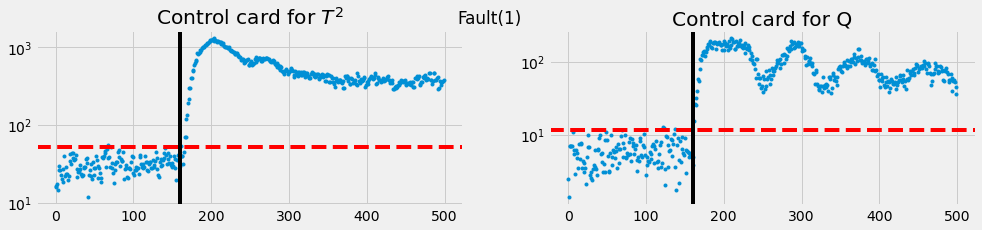

In [102]:
Fault = 1

df_test = faulty_testing_db[(faulty_training_db.faultNumber==Fault) & 
                               (faulty_training_db.simulationRun==1)].iloc[:,3:]

pca.predict(df_test)

pca.plot_control_charts(fault=160)
plt.suptitle(f'Fault({Fault})');
print(f'Faultion detection rate - Fault({Fault})\n--------------')

print(f'T2: {(pca.T2[160:]>pca.T2_lim).sum()/pca.T2[160:].shape[0]}')
print(f'Q: {(pca.Q[160:]>pca.Q_lim).sum()/pca.Q[160:].shape[0]}')

## Fault 2

Fault detection rate - Fault(2)
--------------
T2: 0.985
Q: 0.99


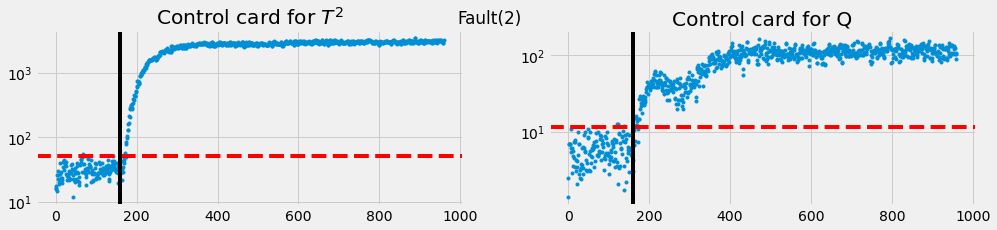

In [103]:
Fault = 2

df_test = faulty_testing_db[(faulty_testing_db.faultNumber==Fault) & 
                               (faulty_testing_db.simulationRun==1)].iloc[:,3:]

pca.predict(df_test)

pca.plot_control_charts(fault=160)
plt.suptitle(f'Fault({Fault})');

#pca.plot_contributions(fault=160, columns = df_test.columns)

print(f'Fault detection rate - Fault({Fault})\n--------------')

print(f'T2: {(pca.T2[160:]>pca.T2_lim).sum()/pca.T2[160:].shape[0]}')
print(f'Q: {(pca.Q[160:]>pca.Q_lim).sum()/pca.Q[160:].shape[0]}')

## Fault 4

Fault detection rate - Fault(4)
--------------
T2: 0.33
Q: 0.99875


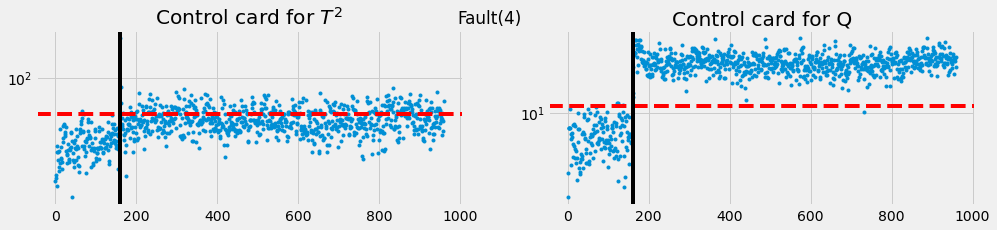

In [104]:
Fault = 4

df_test = faulty_testing_db[(faulty_testing_db.faultNumber==Fault) & 
                               (faulty_testing_db.simulationRun==1)].iloc[:,3:]

pca.predict(df_test)

pca.plot_control_charts(fault=160)
plt.suptitle(f'Fault({Fault})');

#pca.plot_contributions(fault=160, columns = df_test.columns)

print(f'Fault detection rate - Fault({Fault})\n--------------')

print(f'T2: {(pca.T2[160:]>pca.T2_lim).sum()/pca.T2[160:].shape[0]}')
print(f'Q: {(pca.Q[160:]>pca.Q_lim).sum()/pca.Q[160:].shape[0]}')

## Fault 5

Fault detection rate - Fault(5)
--------------
T2: 0.25
Q: 0.19375


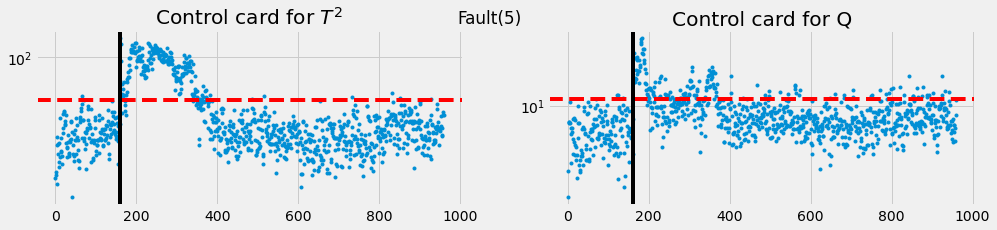

In [105]:
Fault = 5

df_test = faulty_testing_db[(faulty_testing_db.faultNumber==Fault) &  (faulty_testing_db.simulationRun==1)].iloc[:,3:]

pca.predict(df_test)

pca.plot_control_charts(fault=160)
plt.suptitle(f'Fault({Fault})');

#pca.plot_contributions(fault=160, columns = df_test.columns)

print(f'Fault detection rate - Fault({Fault})\n--------------')

print(f'T2: {(pca.T2[160:]>pca.T2_lim).sum()/pca.T2[160:].shape[0]}')
print(f'Q: {(pca.Q[160:]>pca.Q_lim).sum()/pca.Q[160:].shape[0]}')

### Results for PCA

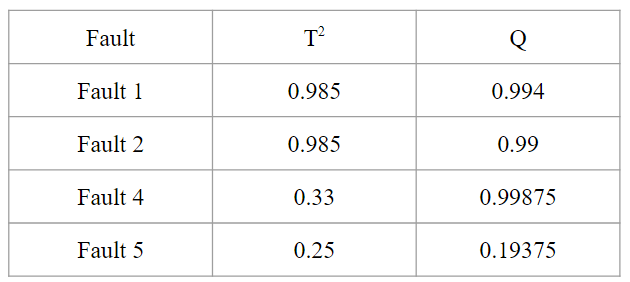

# FDA

In [89]:
#df = pd.read_csv('faulty_testing.csv')
faulty_testing_db.dropna(inplace=True)
X = faulty_testing_db.iloc[:,1:].copy()
target = faulty_testing_db['faultNumber'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3,random_state=0) 

(59156, 2)


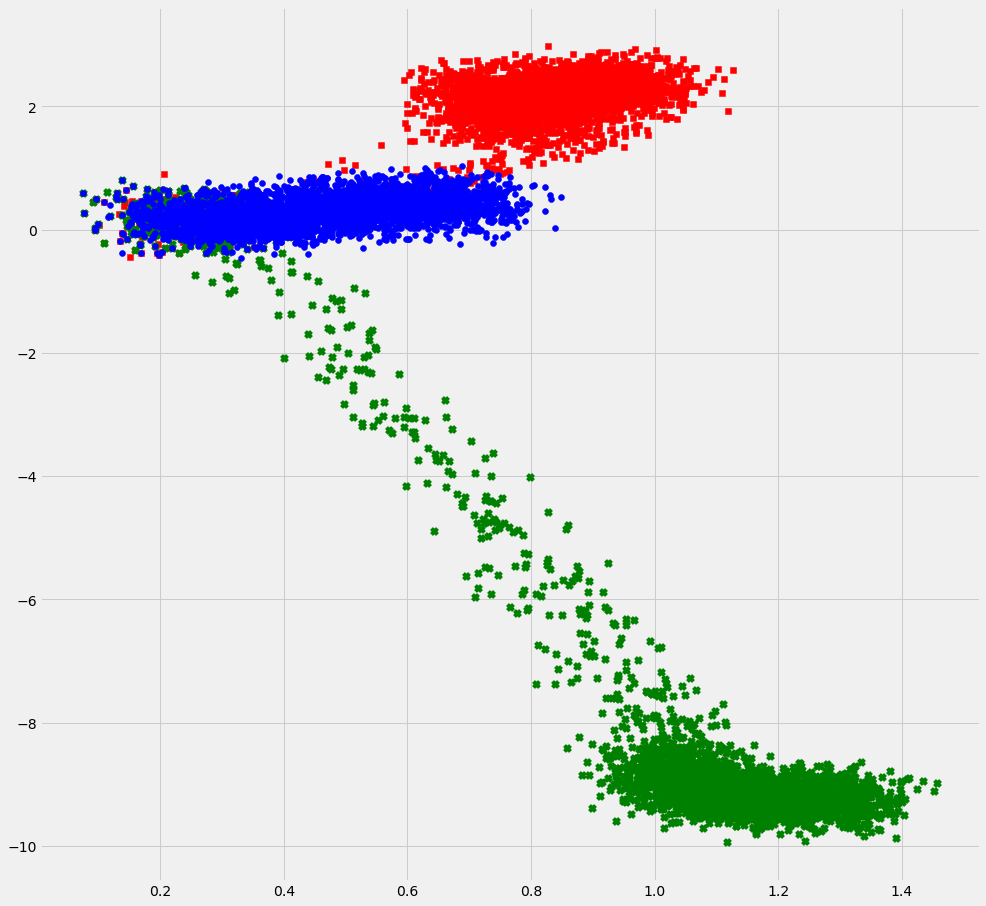

In [90]:
# 1. Instantiate the method and fit_transform the algotithm
LDA = LinearDiscriminantAnalysis(n_components=2) # The n_components key word gives us the projection to the n most discriminative directions in the dataset. We set this parameter to two to get a transformation in two dimensional space.  
data_projected = LDA.fit_transform(X_train,y_train)
print(data_projected.shape)
# PLot the transformed data
markers = ['s','x','o']
colors = ['r','g','b']

fig = plt.figure(figsize=(15,15))
ax0 = fig.add_subplot(111)

for l,m,c in zip(np.unique(y_train),markers,colors):
    ax0.scatter(data_projected[:,0][y_train==l],data_projected[:,1][y_train==l],c=c,marker=m)
    

In [92]:
faulty_testing_db.isnull().values.any()


False

In [93]:
faulty_testing_db.isnull().sum().sum()


0